## Import packages

In [13]:
#import packages
from __future__ import division
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import seaborn as sns
import pickle as pkl
import prettytable

In [2]:
#import machine learning package
import sklearn.ensemble as ek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import tree, linear_model
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.externals import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

## Import complete feature set made from Data Cleaning and EDA notebook


In [3]:
# import complete feature set made from Data Cleaning and EDA notebook
URLdata = pd.read_csv('../data/Complete_Feature_Set.csv', index_col = 0)

In [4]:
# check the loaded dataset
URLdata.head()

,url,no of dots,no of hyphen,len of url,no of at,no of double slash,no of subdir,no of subdomain,len of domain,no of queries,contains IP,presence of Suspicious_TLD,create_age(months),expiry_age(months),update_age(days),country,file extension,label,risk indicator
0,http://livelywebordainedkool.cf/harwoodservice...,0,0,4.189655,0,0,3,0,24,0,0,0,-1,-1,-1,None,.php,1,0
1,amazon.com.br:80/gp/redirect.html?_encoding=UT...,0,0,5.332719,0,0,2,0,16,173,0,0,-1,-1,-1,None,.html,0,0
2,usaerectionrx.com,0,0,2.833213,0,0,0,0,17,0,0,0,9,3,249,UA,.com,0,0
3,http://ciespains.com/delivery/index.htm,0,0,3.465736,0,0,2,0,13,0,0,0,1,11,0,None,.htm,1,0
4,http://paypalsecureresetloginpage.elifelfmarle...,0,0,4.158883,0,0,1,1,44,0,0,0,30,6,905,TR,None,1,0


## Check the Data Balance

In [5]:
#print total number of urls in the dataset
print('There are ' + str(len(URLdata)) + ' urls in the dataset.')
#percentage of malicious url
spam = len(URLdata[URLdata['label']==1])
percent_spam = spam/len(URLdata)*100
print(str(round(percent_spam,2)) + '% of urls are malicious urls.')

There are 47273 urls in the dataset.
49.6% of urls are malicious urls.


## Check NAs in the dataset

In [6]:
#check the existence of NA values 
URLdata.isnull().any()

url                           False
no of dots                    False
no of hyphen                  False
len of url                    False
no of at                      False
no of double slash            False
no of subdir                  False
no of subdomain               False
len of domain                 False
no of queries                 False
contains IP                   False
presence of Suspicious_TLD    False
create_age(months)            False
expiry_age(months)            False
update_age(days)              False
country                       False
file extension                False
label                         False
risk indicator                False
dtype: bool

## One-hot encoding on categorical variables

In [7]:
# Apply one-hot encoding to country and file extension
le = preprocessing.LabelEncoder()
URLdata['country'] = le.fit_transform(URLdata['country'])
URLdata['file extension'] = le.fit_transform(URLdata['file extension'])
URLdata.head(10)

,url,no of dots,no of hyphen,len of url,no of at,no of double slash,no of subdir,no of subdomain,len of domain,no of queries,contains IP,presence of Suspicious_TLD,create_age(months),expiry_age(months),update_age(days),country,file extension,label,risk indicator
0,http://livelywebordainedkool.cf/harwoodservice...,0,0,4.189655,0,0,3,0,24,0,0,0,-1,-1,-1,102,473,1,0
1,amazon.com.br:80/gp/redirect.html?_encoding=UT...,0,0,5.332719,0,0,2,0,16,173,0,0,-1,-1,-1,102,348,0,0
2,usaerectionrx.com,0,0,2.833213,0,0,0,0,17,0,0,0,9,3,249,132,249,0,0
3,http://ciespains.com/delivery/index.htm,0,0,3.465736,0,0,2,0,13,0,0,0,1,11,0,102,345,1,0
4,http://paypalsecureresetloginpage.elifelfmarle...,0,0,4.158883,0,0,1,1,44,0,0,0,30,6,905,128,603,1,0
5,msci.com,0,0,2.079442,0,0,0,0,8,0,0,0,300,0,358,136,249,0,0
6,cecilmarine.com,0,0,2.708050,0,0,0,0,15,0,0,0,214,2,361,136,249,0,0
7,mapharma61.fr/downloader/Maged/Model/Config/ss...,0,0,4.997212,0,0,12,0,13,0,0,0,91,9,417,102,348,1,1
8,http://agencepub.co.rw/Paypal/Account-Limited/...,0,0,4.615121,0,0,8,0,15,0,0,0,-1,-1,-1,102,603,1,1
9,http://alohacomcentre.com/css/,0,0,3.135494,0,0,2,0,18,0,0,0,61,-1,23,121,603,1,0


In [59]:
## Extract the Feature Set and Response Column
X = URLdata.drop(['url','label'],axis=1)
X.to_csv('../data/ModelfeatureSet.csv')
X = URLdata.drop(['url','label'],axis=1).values
y = URLdata['label']
y.to_csv('../data/modelLabel.csv')
y = URLdata['label'].values

In [60]:
y

array([1, 0, 0, ..., 0, 0, 0])

In [42]:
## Split the X,y test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state = 1)

In [35]:
## Sizes of train and test sets
print("Training Set(Features): ", len(X_train))
print("Training Set(y Response): ", len(y_train))
print("Test Set(Features): ", len(X_test))
print("Test Set(y Response): ", len(y_test))

Training Set(Features):  37818
Training Set(y Response):  37818
Test Set(Features):  9455
Test Set(y Response):  9455


In [36]:
## Model candidates for this classification problem

model = { "DecisionTree":tree.DecisionTreeClassifier(max_depth=20),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50),
         "Adaboost":ek.AdaBoostClassifier(n_estimators=100),
         "GradientBoosting":ek.GradientBoostingClassifier(n_estimators=100),
         "LogisticRegression":LogisticRegression()   
}

In [37]:
## Run models
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    results[algo] = score

DecisionTree : 0.9029085140137494 
RandomForest : 0.9279746166049709 
Adaboost : 0.9021681649920676 
GradientBoosting : 0.9120042305658381 


/Users/qiankejin/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression : 0.8534108937070333 


In [13]:
winner = max(results, key=results.get)
print(winner)

RandomForest


In [14]:
## Random Forest got the highest accuracy
## Tune Hyperparameters
np.random.seed(123)

for n_est in [50,100,150,200]:
    for depth in [None, 1, 2, 3, 4]:
        DecisionTree = ek.RandomForestClassifier(n_estimators=n_est, max_depth = depth)
        cv_results = cross_validate(DecisionTree, X, y, cv=10,return_train_score=True) 
        print('n_estimators',n_est, 'max_depth',depth, cv_results['test_score'].mean())

n_estimators 50 max_depth None 0.9275484989968337
n_estimators 50 max_depth 1 0.7702076241167315
n_estimators 50 max_depth 2 0.8336912784907018
n_estimators 50 max_depth 3 0.8654837646580363
n_estimators 50 max_depth 4 0.870412407597786
n_estimators 100 max_depth None 0.927146521385134
n_estimators 100 max_depth 1 0.7790711006065354
n_estimators 100 max_depth 2 0.8426151770471415
n_estimators 100 max_depth 3 0.8636431574403123
n_estimators 100 max_depth 4 0.8732472313984252
n_estimators 150 max_depth None 0.9280984860041503
n_estimators 150 max_depth 1 0.7801076050017437
n_estimators 150 max_depth 2 0.8388711776072194
n_estimators 150 max_depth 3 0.8648280560370996
n_estimators 150 max_depth 4 0.8709202007992202
n_estimators 200 max_depth None 0.92759072410284
n_estimators 200 max_depth 1 0.7740776096679018


KeyboardInterrupt: 

In [15]:
##n_estimators 150 max_depth None 0.9280984860041503
## 10-fold CV
np.random.seed(123)
RandomForest = ek.RandomForestClassifier(n_estimators=150)
cv_results = cross_validate(RandomForest, X, y, cv=10,return_train_score=True) 
print("10-fold cross validation accuracy of the model is: ",cv_results['test_score'].mean())

10-fold cross validation accuracy of the model is:  0.9279503512944244


In [155]:
cv_roc = cross_val_score(RandomForest, X, y, cv=10, scoring='roc_auc').mean()
print("10-fold cross validation AUC of the model is ", cv_roc)

10-fold cross validation AUC of the model is  0.9799157804629399


In [180]:
GB = ek.GradientBoostingClassifier(n_estimators=100)
cv_results = cross_validate(GB, X, y, cv=10,return_train_score=True) 
cv_roc = cross_val_score(GB, X, y, cv=10, scoring='roc_auc').mean()
print("10-fold cross validation AUC of the model is ", cv_roc)

10-fold cross validation AUC of the model is  0.9697760249804258


In [181]:
AB = ek.AdaBoostClassifier(n_estimators=100)
cv_results = cross_validate(AB, X, y, cv=10,return_train_score=True) 
cv_roc = cross_val_score(AB, X, y, cv=10, scoring='roc_auc').mean()
print("10-fold cross validation AUC of the model is ", cv_roc)

10-fold cross validation AUC of the model is  0.965173981634873


In [184]:
DT = tree.DecisionTreeClassifier(max_depth=20)
cv_results = cross_validate(DT, X, y, cv=10,return_train_score=True) 
cv_roc = cross_val_score(DT, X, y, cv=10, scoring='roc_auc').mean()
print("10-fold cross validation AUC of the model is ", cv_roc)

10-fold cross validation AUC of the model is  0.9177181938331926


## Save Model

In [37]:
# model:
np.random.seed(123)
RandomForest = ek.RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train,y_train)
with open('../model/randomForest.pkl', 'wb') as f:
    pkl.dump(RandomForest, f)


/Users/qiankejin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


## Model Evaluation

In [38]:
model_path_in = '../model/randomForest.pkl'
with open(model_path_in, "rb") as f:
        RF = pkl.load(f)

In [39]:
X = pd.read_csv('../data/ModelfeatureSet.csv', index_col = 0).values
y = pd.read_csv('../data/modelLabel.csv', header = None, index_col = 0).values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state = 1)

In [69]:
def ModelEvaluation(model,x_test, y_test, plot=False):

    y_pred_class = model.predict(x_test)
    # calculate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    
    # test set class balance
    bad_percent = y_test.mean()
    
    #Confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    cfm = pd.DataFrame(data=confusion[1:,1:],index=confusion[1:,0],columns=confusion[0,1:]) 
    # save confusion matrix
    cfm.to_csv('../evaluation/ConfusionMatrix.csv')
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    # save confusion matrix heatmap
    plt.savefig('../image/confusion_matrix.png')
    
    # False Positive Rate
    FP = (confusion[0][1] / float(sum(confusion[0])))
    FN = (confusion[1][0] / float(sum(confusion[1])))
    F1 = f1_score(y_test, y_pred_class, average='binary')

    # Precision
    Precision = metrics.precision_score(y_test, y_pred_class)
    
    auc = metrics.roc_auc_score(y_test, y_pred_class)

    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    
    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size 
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8, color="mediumpurple")
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
        # save prediction probability histogram
        plt.savefig('../image/probHist.png')

    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        plt.plot(fpr, tpr, color="mediumpurple", label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for malicious url classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
        # save ROC
        plt.savefig('../image/ROC.png')
    
    model_eval = prettytable.PrettyTable(["Random Forest", "n_estimators = 150"])
    model_eval.add_row(["Classification Accuracy", accuracy])
    model_eval.add_row(["False Positive", FP]) 
    model_eval.add_row(["False Negative", FN]) 
    model_eval.add_row(["F1 Score", F1])  
    model_eval.add_row(["AUC", roc_auc])
    print(model_eval)
#     with open('../evaluation/model_evaluation.txt', 'w') as w:
#         w.write(str(model_eval))
    

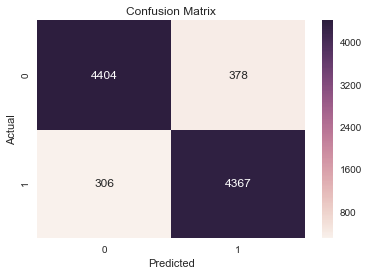

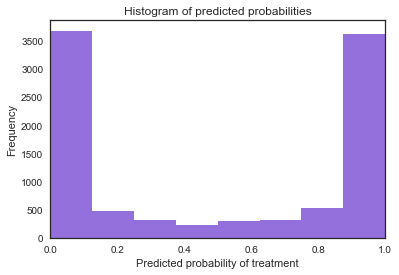

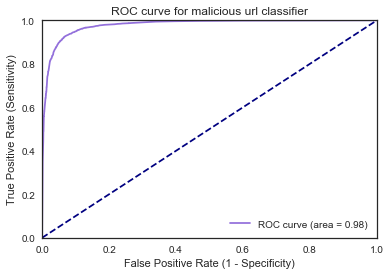

+-------------------------+---------------------+
|      Random Forest      |  n_estimators = 150 |
+-------------------------+---------------------+
| Classification Accuracy |  0.9276573241671073 |
|      False Positive     | 0.07904642409033877 |
|      False Negative     | 0.06548255938369356 |
|         F1 Score        |  0.9273731153111064 |
|           AUC           |  0.9779771233573221 |
+-------------------------+---------------------+


In [70]:
ModelEvaluation(RF, X_test, y_test, plot=True)

Feature ranking:
1. feature no of subdir (0.207718)
2. feature len of url (0.170663)
3. feature create_age(months) (0.167072)
4. feature file extension (0.127456)
5. feature len of domain (0.097699)
6. feature no of subdomain (0.055468)
7. feature expiry_age(months) (0.051657)
8. feature update_age(days) (0.039343)
9. feature risk indicator (0.027684)
10. feature no of queries (0.023847)
11. feature country (0.020584)
12. feature no of hyphen (0.006061)
13. feature contains IP (0.003632)
14. feature no of dots (0.000473)
15. feature presence of Suspicious_TLD (0.000378)
16. feature no of double slash (0.000263)
17. feature no of at (0.000001)


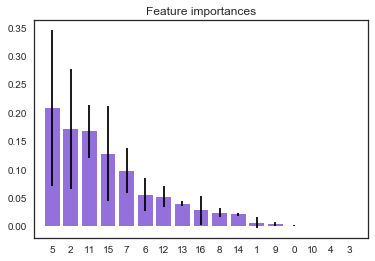

In [76]:
###鸡鸡todo： make function  图片保存 文字txt 谢谢哟！

featureSet = pd.read_csv('../data/Complete_Feature_Set.csv', index_col = 0) #要改成FeatureData.csv

forest = RF
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, list(featureSet.drop(['url','label'],axis=1))[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="mediumpurple", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [209]:
for i in clf.predict([[  1       ,   1        ,   3.8286414 ,   3      ,
          0        ,   2        ,   0        ,  20        ,
          0        ,   0       ,   0        ,  95        ,
          1        ,   2        ,  98        , 184        ,
          1        ],
       [  0.        ,   0.        ,   5.09986643,   0.        ,
          0.        ,   6.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,  -1.        ,
         -1.        ,  -1.        ,  89.        , 262.        ,
          1.        ]]):
    print(i)
clf.predict_proba([[  1       ,   1        ,   3.8286414 ,   3      ,
          0        ,   2        ,   0        ,  20        ,
          0        ,   0       ,   0        ,  95        ,
          1        ,   2        ,  98        , 184        ,
          1        ],
       [  0.        ,   0.        ,   5.09986643,   0.        ,
          0.        ,   6.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,  -1.        ,
         -1.        ,  -1.        ,  89.        , 262.        ,
          1.        ]])

1
0


array([[0.04666667, 0.95333333],
       [0.66      , 0.34      ]])

In [ ]:
evalClassModel(RF, y, res, plot=True)

In [100]:
y = pd.Series(y)
res = pd.Series(res)
evalClassModel(clf, y, res, plot=True)

Exception: Data must be 1-dimensional

## Scoring

array([[    0,     1],
       [    1,     0],
       [    2,     0],
       ...,
       [47270,     0],
       [47271,     0],
       [47272,     0]])